In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df= pd.DataFrame(data.data, columns = data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
df['Price'] = data.target

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df = df.sample(frac = 0.20)

In [8]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9520,1.8042,17.0,4.060150,0.992481,878.0,2.200501,39.14,-123.20
16371,3.1471,13.0,5.147208,1.015228,712.0,3.614213,38.03,-121.30
5854,4.2396,48.0,5.629630,1.052288,1118.0,2.435730,34.17,-118.33
17749,4.0929,33.0,4.739535,0.888372,938.0,4.362791,37.34,-121.84
16302,3.6750,22.0,5.098712,1.044349,1539.0,2.201717,38.00,-121.35
...,...,...,...,...,...,...,...,...
734,4.2386,34.0,6.072000,1.066000,1366.0,2.732000,37.67,-122.14
6711,7.4817,41.0,6.813901,1.080717,973.0,2.181614,34.14,-118.16
5668,3.3397,28.0,4.530686,1.052347,1388.0,2.505415,33.72,-118.30
3294,1.8571,16.0,6.424925,1.427928,1596.0,2.396396,38.99,-122.65


In [11]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [12]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5355000448758616

In [17]:
parameter= {
    'criterion':['squared_error', 'poissor'],
    'max_depth': [1,2,3,4,6,8],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt','log2']
}
reg = DecisionTreeRegressor()

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
model = GridSearchCV(reg, param_grid=parameter,cv=5, scoring= 'neg_mean_squared_error')

In [20]:
model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [21]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [23]:
final_model = DecisionTreeRegressor(criterion= 'squared_error', max_depth =8 )

In [24]:
final_model

DecisionTreeRegressor(max_depth=8)

In [26]:
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

[Text(0.5497311827956989, 0.9444444444444444, 'x[0] <= 5.047\nsquared_error = 1.313\nsamples = 2889\nvalue = 2.073'),
 Text(0.2823420698924731, 0.8333333333333334, 'x[0] <= 3.107\nsquared_error = 0.797\nsamples = 2272\nvalue = 1.735'),
 Text(0.416036626344086, 0.8888888888888888, 'True  '),
 Text(0.14868951612903225, 0.7222222222222222, 'x[6] <= 34.615\nsquared_error = 0.499\nsamples = 1089\nvalue = 1.375'),
 Text(0.06922043010752688, 0.6111111111111112, 'x[7] <= -118.295\nsquared_error = 0.504\nsamples = 547\nvalue = 1.605'),
 Text(0.03293010752688172, 0.5, 'x[5] <= 2.212\nsquared_error = 0.763\nsamples = 123\nvalue = 2.246'),
 Text(0.01747311827956989, 0.3888888888888889, 'x[0] <= 2.99\nsquared_error = 0.987\nsamples = 28\nvalue = 2.876'),
 Text(0.010752688172043012, 0.2777777777777778, 'x[4] <= 1571.5\nsquared_error = 0.759\nsamples = 26\nvalue = 2.729'),
 Text(0.005376344086021506, 0.16666666666666666, 'x[7] <= -118.365\nsquared_error = 0.379\nsamples = 17\nvalue = 2.41'),
 Text(0.

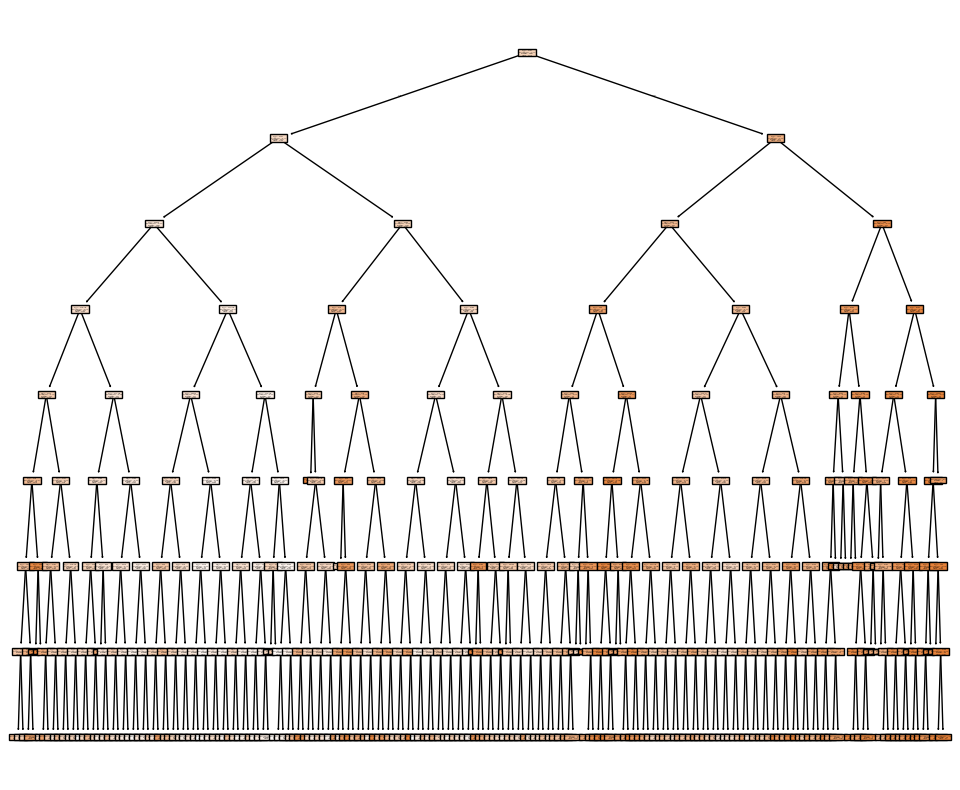

In [27]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(final_model, filled = True ) 

In [29]:
y_pred = model.predict(X_test)

In [30]:
r2_score(y_test, y_pred)

0.5234281602565494